<a href="https://colab.research.google.com/github/SultanaUmmeHabiba/Heart-Disease-prediction-with-smote/blob/main/Copy_of_Cleveland_heart_smote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install smote-variants

     |████████████████████████████████| 143kB 12.7MB/s 
  Created wheel for statistics: filename=statistics-1.0.3.5-cp36-none-any.whl size=7454 sha256=ca0ffe7609e13d906b265754888cf21b1a6d52fbd68d663c70dd4ad76b02cfb7
  Stored in directory: /root/.cache/pip/wheels/75/55/90/73aa7662bfb4565b567618547a275f01372a678ca92ecd64f3
  Created wheel for minisom: filename=MiniSom-2.2.7-cp36-none-any.whl size=8607 sha256=9960ea559c5f6e0676aff056cae1b299389a8682fb6d577c9a0ab6ceaca0ca34
  Stored in directory: /root/.cache/pip/wheels/db/9a/af/0fca4ced67fec66c00998c4bf55b13f0a4c882ee775f278862
Successfully built statistics minisom


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import smote_variants as sv
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
import io
import pandas as pd


dataset= pd.read_csv(io.BytesIO(uploaded['heart.csv']))

# **Without smote**

In [ ]:
X= dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

minority class: 138
majority class: 165


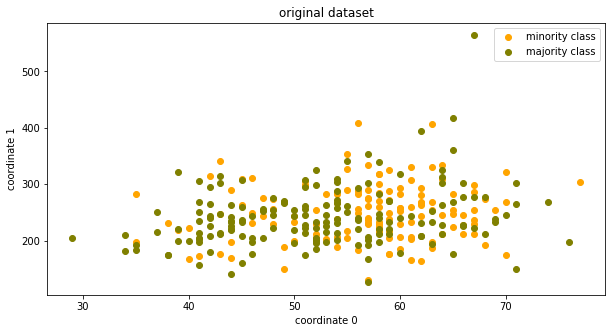

In [ ]:

plt.figure(figsize=(10, 5))
plt.scatter(X[y == 0][:,0], X[y == 0][:,4], label='minority class', c='orange')
plt.scatter(X[y == 1][:,0], X[y == 1][:,4], label='majority class', c='olive')
plt.title('original dataset')
plt.xlabel('coordinate 0')
plt.ylabel('coordinate 1')
plt.legend()

print('minority class: %d' % np.sum(y == 0))
print('majority class: %d' % np.sum(y == 1))


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


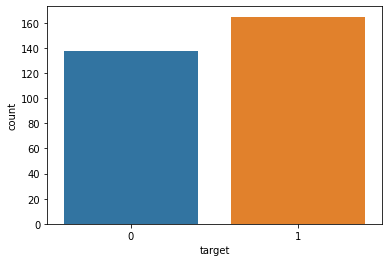

In [ ]:
import seaborn as sns
sns.countplot(dataset['target'])

In [ ]:

print('majority class: %d' % np.sum(y == 0))
print('minority class: %d' % np.sum(y == 1))

majority class: 138
minority class: 165


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

Accuracy: 
86.88524590163934
[[26  3]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

10 fold cross validation
80.50537634408602
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       138
           1       0.82      0.83      0.82       165

    accuracy                           0.81       303
   macro avg       0.80      0.80      0.80       303
weighted avg       0.81      0.81      0.81       303



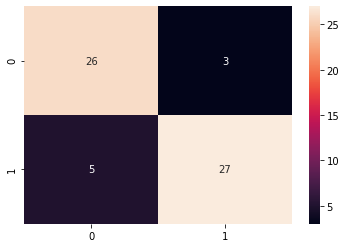

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
nb1 = GaussianNB()
nb1.fit(X_train, y_train)
y_pred=nb1.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score,cross_val_predict
print("Accuracy: ")
print(accuracy_score(y_pred, y_test)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="0.0f")
print("10 fold cross validation")
nb2 = cross_val_score(nb1, X, y, cv=10)
print(nb2.mean()*100)
predictions = cross_val_predict(nb1, X, y, cv=10)
print(classification_report(y,predictions))

random Forest accuracy:  85.24590163934425
[[24  5]
 [ 4 28]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

83.49462365591398
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       138
           1       0.83      0.88      0.85       165

    accuracy                           0.83       303
   macro avg       0.84      0.83      0.83       303
weighted avg       0.84      0.83      0.83       303



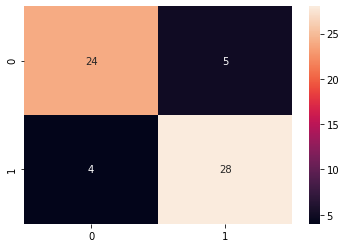

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=10, random_state=0)
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test) 
acc = accuracy_score(y_test, y_pred)

print ("random Forest accuracy: ",acc*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="0.0f")

scores = cross_val_score(clf_rf, X, y, cv=10)
print(scores.mean()*100)
predictions = cross_val_predict(clf_rf, X, y, cv=10)
print(classification_report(y,predictions))

# **With smote**

In [ ]:
import smote_variants as sv
oversampler= sv.SMOTE()
X_samp, y_samp= oversampler.sample(X, y)
Xtrain_oversample, ytrain_oversample = oversampler.fit_resample(X_train, y_train)
X_oversample, y_oversample = oversampler.fit_resample(X, y)

2020-11-15 11:20:31,644:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2020-11-15 11:20:31,653:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2020-11-15 11:20:31,658:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


In [ ]:
oversamplers= sv.get_all_oversamplers()
X_samp, y_samp= X_samp[len(X):], y_samp[len(y):]

print('majority new samples: %d' % np.sum(y_samp == 0))
print('minority new samples: %d' % np.sum(y_samp == 1))

majority new samples: 27
minority new samples: 0


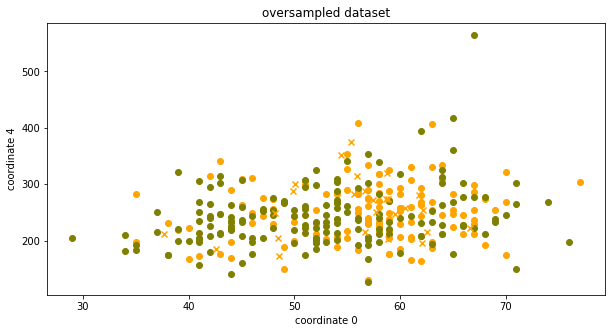

In [ ]:

plt.figure(figsize=(10, 5))

plt.scatter(X[y == 0][:,0], X[y == 0][:,4], c='orange',label='minority class')
plt.scatter(X[y == 1][:,0], X[y == 1][:,4], c='olive', label='majority class')
plt.scatter(X_samp[y_samp == 0][:,0], X_samp[y_samp == 0][:,4], label='new minority samples', c='orange', marker='x')
plt.title('oversampled dataset')
plt.xlabel('coordinate 0')
plt.ylabel('coordinate 4')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


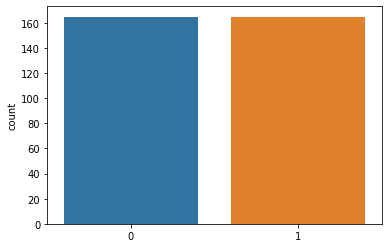

In [ ]:
sns.countplot(y_oversample)

Accuracy: 
85.24590163934425
[[26  3]
 [ 6 26]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61

10 fold cross validation
80.60606060606061
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       165
           1       0.80      0.82      0.81       165

    accuracy                           0.81       330
   macro avg       0.81      0.81      0.81       330
weighted avg       0.81      0.81      0.81       330



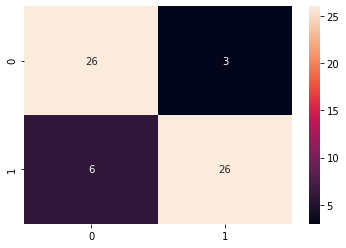

In [ ]:
nb1 = GaussianNB()
nb1.fit(Xtrain_oversample, ytrain_oversample)
y_pred=nb1.predict(X_test)
print("Accuracy: ")
print(accuracy_score(y_pred, y_test)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="0.0f")
print("10 fold cross validation")
nb2 = cross_val_score(nb1, X_oversample, y_oversample, cv=10)
print(nb2.mean()*100)
predictions = cross_val_predict(nb1, X_oversample, y_oversample, cv=10)
print(classification_report(y_oversample,predictions))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=10, random_state=0)
clf_rf.fit(Xtrain_oversample, ytrain_oversample)
y_pred = clf_rf.predict(X_test) 
acc = accuracy_score(y_test, y_pred)

print ("random Forest accuracy: ",acc*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="0.0f")
scores = cross_val_score(clf_rf, X_oversample, y_oversample, cv=10)
print(scores.mean()*100)
predictions = cross_val_predict(clf_rf, X_oversample, y_oversample, cv=10)
print(classification_report(y_oversample,predictions))

# **With smote veriant**

In [ ]:
import smote_variants as sv
oversampler= sv.distance_SMOTE()
X_samp, y_samp= oversampler.sample(X, y)
Xtrain_oversample, ytrain_oversample = oversampler.fit_resample(X_train, y_train)
X_oversample, y_oversample = oversampler.fit_resample(X, y)

2020-11-15 09:46:31,300:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2020-11-15 09:46:31,318:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2020-11-15 09:46:31,324:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


In [ ]:
oversamplers= sv.get_all_oversamplers()

In [ ]:
X_samp, y_samp= X_samp[len(X):], y_samp[len(y):]

print('majority new samples: %d' % np.sum(y_samp == 0))
print('minority new samples: %d' % np.sum(y_samp == 1))

majority new samples: 27
minority new samples: 0


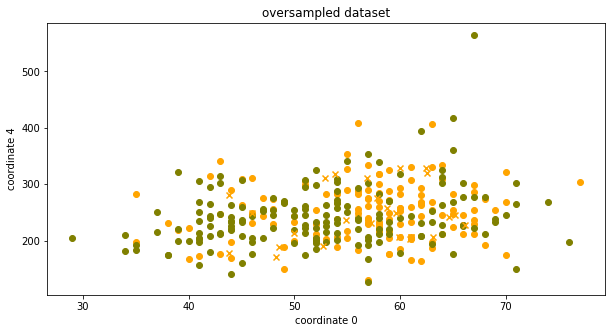

In [ ]:

plt.figure(figsize=(10, 5))

plt.scatter(X[y == 0][:,0], X[y == 0][:,4], c='orange',label='minority class')
plt.scatter(X[y == 1][:,0], X[y == 1][:,4], c='olive', label='majority class')
plt.scatter(X_samp[y_samp == 0][:,0], X_samp[y_samp == 0][:,4], label='new minority samples', c='orange', marker='x')
plt.title('oversampled dataset')
plt.xlabel('coordinate 0')
plt.ylabel('coordinate 4')
plt.show()



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


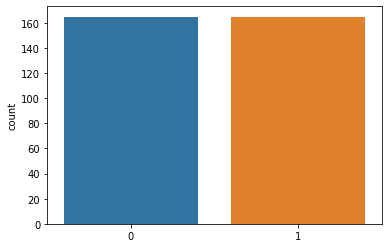

In [ ]:
sns.countplot(y_oversample)

Accuracy: 
85.24590163934425
[[26  3]
 [ 6 26]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61

10 fold cross validation
80.60606060606061
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       165
           1       0.80      0.82      0.81       165

    accuracy                           0.81       330
   macro avg       0.81      0.81      0.81       330
weighted avg       0.81      0.81      0.81       330



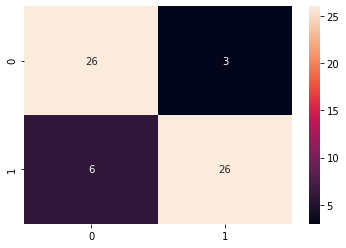

In [ ]:
nb1 = GaussianNB()
nb1.fit(Xtrain_oversample, ytrain_oversample)
y_pred=nb1.predict(X_test)
print("Accuracy: ")
print(accuracy_score(y_pred, y_test)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="0.0f")
print("10 fold cross validation")
nb2 = cross_val_score(nb1, X_oversample, y_oversample, cv=10)
print(nb2.mean()*100)
predictions = cross_val_predict(nb1, X_oversample, y_oversample, cv=10)
print(classification_report(y_oversample,predictions))

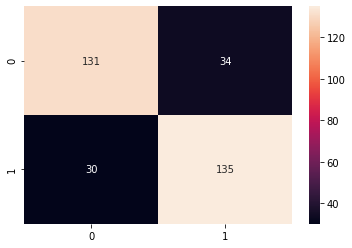

In [ ]:
sns.heatmap(confusion_matrix(y_oversample,predictions),annot=True,fmt="0.0f")

random Forest accuracy:  81.9672131147541
[[24  5]
 [ 6 26]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

84.84848484848484
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       165
           1       0.83      0.87      0.85       165

    accuracy                           0.85       330
   macro avg       0.85      0.85      0.85       330
weighted avg       0.85      0.85      0.85       330



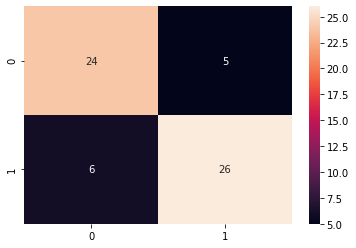

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=10, random_state=0)
clf_rf.fit(Xtrain_oversample, ytrain_oversample)
y_pred = clf_rf.predict(X_test) 
acc = accuracy_score(y_test, y_pred)

print ("random Forest accuracy: ",acc*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="0.0f")
scores = cross_val_score(clf_rf, X_oversample, y_oversample, cv=10)
print(scores.mean()*100)
predictions = cross_val_predict(clf_rf, X_oversample, y_oversample, cv=10)
print(classification_report(y_oversample,predictions))


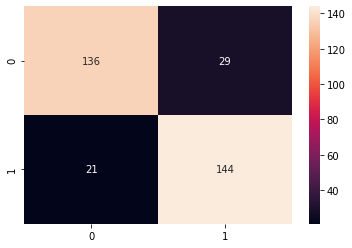

In [ ]:
sns.heatmap(confusion_matrix(y_oversample,predictions),annot=True,fmt="0.0f")